# Phoible explorations in language dis/similarity
[Phoible](https://phoible.github.io/) is a highly structured dataset of phonemic inventories by language.

[My blog post summary of this code exploration.](https://rfong.github.io/rflog/2021/06/15/phonemic-similarity/)

In [2]:
import csv
import itertools
import matplotlib
import matplotlib.pyplot as plt

### Load the data

In [4]:
# Load & process dataset into a dict {<str>: <set>} mapping language IDs to sets of phonemes.
with open('phoible.csv', 'r') as f:
    reader = csv.DictReader(f)
    lang_phonemes = {}  # {id: set(phonemes)}
    langs = {}  # {id: row}
    all_phonemes = set()

    for row in reader:
        idx = row['InventoryID']
        if idx not in lang_phonemes:
            lang_phonemes[idx] = set()
        lang_phonemes[idx].add(row["Phoneme"])
        langs[idx] = row
        all_phonemes.add(row["Phoneme"])

### Quick overview

In [5]:
# Check the dataset format
print("%d languages" % len(lang_phonemes))
print("\nCSV field names:", reader.fieldnames)

3020 languages

CSV field names: ['InventoryID', 'Glottocode', 'ISO6393', 'LanguageName', 'SpecificDialect', 'GlyphID', 'Phoneme', 'Allophones', 'Marginal', 'SegmentClass', 'Source', 'tone', 'stress', 'syllabic', 'short', 'long', 'consonantal', 'sonorant', 'continuant', 'delayedRelease', 'approximant', 'tap', 'trill', 'nasal', 'lateral', 'labial', 'round', 'labiodental', 'coronal', 'anterior', 'distributed', 'strident', 'dorsal', 'high', 'low', 'front', 'back', 'tense', 'retractedTongueRoot', 'advancedTongueRoot', 'periodicGlottalSource', 'epilaryngealSource', 'spreadGlottis', 'constrictedGlottis', 'fortis', 'raisedLarynxEjective', 'loweredLarynxImplosive', 'click']


Text(0.5, 0, 'phoneme inventory size')

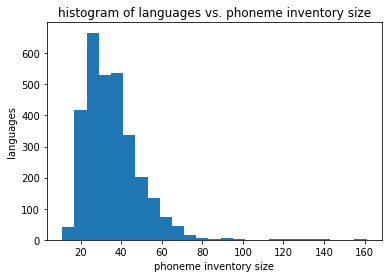

In [6]:
# Quick visualization overview
fig, ax = plt.subplots()
ax.hist([len(ps) for ps in lang_phonemes.values()], bins=25)
ax.set_title("histogram of languages vs. phoneme inventory size")
ax.set_ylabel("languages")
ax.set_xlabel("phoneme inventory size")

### Convenience methods

In [12]:
def get_lang_name(idx, use_dialect_name=False):
    la = langs[idx].get('LanguageName')
    di = langs[idx].get('SpecificDialect')
    if use_dialect_name is False or di in la:
        return la
    return "%s (%s)" % (la, di)

def prettyf_lang(idx, ps):
    '''Return pretty print string'''
    return "{0} [{1}]".format(
        get_lang_name(idx, use_dialect_name=True),
        len(ps)
    )

def are_related_dialects(idx1, idx2):
    '''
    Return true if these IDs denote subdialects of the same lang.
    This is not bulletproof due to some formatting inconsistencies
    in the dataset.
    '''
    la1 = langs[idx1]['LanguageName'].split('(')[0]
    la2 = langs[idx2]['LanguageName'].split('(')[0]
    return la1 == la2

## Let's ask some questions!

In [229]:
# Question: Which languages have the smallest and largest phonemic inventories?
sorted_langs = sorted(lang_phonemes.items(), key=lambda tup: len(tup[1]), reverse=True)

print(prettyf_lang(*sorted_langs[0]))
print(sorted_langs[0][1])

idx, ps = sorted_langs[-1]
print(prettyf_lang(*sorted_langs[-1]))
print(sorted_langs[-1][1])

!Xóõ (NA) [161]
{'ɡʘkʰ', 'kʘ', 'uˤ', 'kǁh', 'pʼkxʼ', 'ɡʘ', 'tx', 'ɲ', 'i', 'ɡǃkʰ', 'kǁʰ', 'kʰ', 'kʼ', 'kǀkxʼ', 'kǃʔ', 'kǀʰ', 'aᴱ', 't̪ʼ', '˨', 'kǁʔ', 'ɢǃ', 'oˤ', 'qǀʼ', '˧', 'a̤', 'ḛ', 'ɡǃ', 'd̪x', 'kǃkxʼ', 'ɡǁkxʼ', 'qʘʼ', 'tʼ', 'kǀx', 'ʔŋǂ', 'kǁ', 'kǂh', 'ŋǁ', 'd̪ʼkxʼ', 'qʰ', 'ŋǂ', 'kʘkxʼ', 'pʰ', 'ʔŋʘ', 'ɢ', 'ˀm', 'kǀ', 'e̤', 'kǁkxʼ', 'ḭ', 'ʔŋǃ', 'ˀn', 'b', 'kʘʰ', 'ɢʱ', 'ɡǀ', 'n̪', 'ʔ', 't̪ʰ', 'kǂ', 'ɡ', 'a', 'ɡǁkʰ', 'ɡʱ', 'ɡǃkxʼ', 'ŋ̊ǂ', 'ɢʘ', 'e', 'dʼkxʼ', 'ɡǂ', 'ɡǀkʰ', 'k', 'tʰ', 'ɡǃx', 'kǀh', 'kǁx', 'kǃx', 'kǂkxʼ', 'ɡʘkxʼ', 'o', 'd̪ʱ', 'qʘ', 'dʱ', 'd', 'qǃʼ', 'ɢǃqʰ', 'kǂʔ', 'i̤', 'u', 'qǂʼ', 'õ', 'ṵ', 'ŋ̊ʘ', 'ŋ̊ǃ', 'kǂʰ', 'kʘʔ', 'o̤', 'ŋʘ', 'f', 'ɡǂkʰ', 'ṳ', 'ŋ̊ǁ', 'ɡǁ', 'ɸ', 'h', '˦', 'qǃ', 'ɢǂ', 'qǀ', 'ũ', 'l', 'ŋǀ', 'ɢǀ', 'ẽ', 'ŋǃ', 'ʔŋǁ', 'ɢǁqʰ', 'd̪', 'ɡǀx', 'x', 'dx', 'p', 'ɡǂx', 'ɢǁ', 'oᴱ', 't̪', 't', 'kʘh', 'qǁʼ', 'a̰', 'ɢǀqʰ', 'ɡʘx', 'kǃʰ', 'eˤ', 'kxʼ', 'qǁ', 'kǀʔ', 'ĩ', 'qǂ', 'iˤ', 'ɟ', 'qʼ', 's', 'ɡǀkxʼ', 'o̰', 'ɡǁx', 'uᴱ', 't̪ʼkxʼ', 'kǃ', 't̪x', 'ŋ̊ǀ', 'ɡʼkxʼ

In [263]:
# Question: What pair of langs has the maximum phoneme union?
# (What pair of languages would you theoretically teach a baby
#  to give them the largest inventory of distinct phonemes?)
max_union_pair = max(
    itertools.combinations(lang_phonemes.items(), 2),
    key=lambda ps: len(ps[0][1].union(ps[1][1]))
)
(iso1, iso2) = (max_union_pair[0][0], max_union_pair[1][0])
(ps1, ps2) = (max_union_pair[0][1], max_union_pair[1][1])
print("Max union pair: %s and %s. Union = %d phonemes" % \
      (prettyf_lang(*max_union_pair[0]), prettyf_lang(*max_union_pair[1]), len(ps1.union(ps2))))

Max union pair: !Xóõ (NA) [161] and Kildin Saami (NA) [128]. Union = 274 phonemes


In [14]:
# Question: What pair of langs (not related to each other as 
# dialects) have the maximum phoneme intersection? In other 
# words, what pair of languages has the largest volume of overlap?
# (Note that this is a different question from "what langs overlap
#  by the largest *percentage* of their inventories?")

# It's ok to lazily take all pairwise combos, ~9M
max_intersect_pair = max(
    itertools.combinations(lang_phonemes.items(), 2),
    key=lambda ps: (
        0 if are_related_dialects(ps[0][0], ps[1][0])
        else len(ps[0][1].intersection(ps[1][1]))
    ),
)

In [15]:
(ps1, ps2) = (max_intersect_pair[0][1], max_intersect_pair[1][1])
print("Max intersected pair: %s and %s. Intersection = %d phonemes" % \
      (prettyf_lang(*max_intersect_pair[0]), prettyf_lang(*max_intersect_pair[1]), len(ps1.intersection(ps2))))

Max intersected pair: Kanga (Kanga) [76] and Kadugli (Miri) [63]. Intersection = 62 phonemes


In [29]:
# Questions: What pair(s) of langs have maximal overlapping percentage?
# Are any complete subsets of another lang?

# Takes a nested tuple ((idx1, phonemes1), (idx2, phonemes2))
get_similarity_index = lambda ps: max(
    len(ps[0][1].intersection(ps[1][1]))/len(ps[0][1])*1.0,
    len(ps[0][1].intersection(ps[1][1]))/len(ps[1][1])*1.0
)

most_sim = sorted(
    itertools.combinations(lang_phonemes.items(), 2),
    key=get_similarity_index,
    reverse=True
)

In [33]:
max_sim_ind = get_similarity_index(most_sim[0])
num_max_sim_pairs = 0
for ps in most_sim:
    if get_similarity_index(ps) < max_sim_ind:
        break
    num_max_sim_pairs += 1

In [34]:
print("%d pairs found with %.2f similarity" % (num_max_sim_pairs, max_sim_ind))
print("\tSampling a few of them:")
for ps in most_sim[:5]:
    sim_ind = get_similarity_index(ps)
    if sim_ind < max_sim_ind:
        break
    if len(ps[0][1]) > len(ps[1][1]):
        print(prettyf_lang(*ps[0]), prettyf_lang(*ps[1]))
    else:
        print(prettyf_lang(*ps[1]), prettyf_lang(*ps[0]))
    print("\toverlap:", ps[0][1].intersection(ps[1][1]))

13975 pairs found with 1.00 similarity
	Sampling a few of them:
Kota (NA) [34] KOTA (NA) [28]
	overlap: {'i', 'kʰ', 'r', 'pʰ', 'e̞', 't̪ʰ', 'u', 'a', 'n', 'l', 'd̪', 'b', 'ɖ', 'm', 'ʈʰ', 'ɳ', 'ʂ', 'd', 'ɭ', 'tʰ', 'ɽ', 'ŋ', 'ɡ', 'j', 'o̞', 't̠ʃʰ', 'v', 'd̠ʒ'}
Sedang (NA) [53] Ainu (NA) [17]
	overlap: {'ɔ', 'h', 'n', 'p', 'i', 'r', 's', 'j', 'a', 'ʔ', 'u', 'w', 'ɛ', 'k', 't', 'm', 't̠ʃ'}
Sedang (NA) [53] Southern Nuautl (NA) [17]
	overlap: {'h', 'n', 'i', 'l', 'p', 'r', 's', 'j', 'e', 'ʔ', 'u', 'w', 'a', 'k', 't', 'o', 'm'}
Yao (NA) [49] Orokaiva (NA) [17]
	overlap: {'h', 'dz', 'i', 'p', 'n', 'ŋ', 'ɡ', 's', 'd', 'e', 'u', 'b', 'a', 'o', 'k', 't', 'm'}
Yao (NA) [49] Samo (NA) [18]
	overlap: {'ɔ', 'h', 'f', 'l', 'i', 'ɡ', 's', 'd', 'j', 'e', 'u', 'b', 'w', 'a', 'k', 't', 'o', 'm'}


In [44]:
# Question: What langs have the fewest phonemes in common?
num_min_sim_pairs = 0
for ps in reversed(most_sim):
    if get_similarity_index(ps) > 0:
        break
    num_min_sim_pairs += 1
print("%d pairs found with 0.0 similarity" % num_min_sim_pairs)
for ps in reversed(most_sim[-num_min_sim_pairs:]):
    print(ps[0][0], prettyf_lang(*ps[0]), ps[1][0], prettyf_lang(*ps[1]))

19 pairs found with 0.0 similarity
2372 Northern Altai (Northern Altai (Kumandy)) [34] 2607 Najdi Arabic (NA) [33]
2143 Pisamira [17] 2453 Miyako (Miyako (Ogami)) [19]
1993 Yuhup [35] 2453 Miyako (Miyako (Ogami)) [19]
1991 Hup [34] 2453 Miyako (Miyako (Ogami)) [19]
1238 Crow (NA) [23] 2453 Miyako (Miyako (Ogami)) [19]
1020 Hup (NA) [29] 2453 Miyako (Miyako (Ogami)) [19]
870 Usarufa (NA) [22] 2521 Irish (Irish (Corca Dhuibhne)) [52]
619 WARIS (NA) [22] 2453 Miyako (Miyako (Ogami)) [19]
611 WICHITA (NA) [29] 2434 Eastern Khanty (Eastern Khanty (Vakh)) [30]
556 SIRIONO (NA) [28] 2453 Miyako (Miyako (Ogami)) [19]
528 ROTOKAS (NA) [11] 2610 Kabardian (Kabardian (Turkish)) [51]
477 PIRAHA (NA) [11] 2453 Miyako (Miyako (Ogami)) [19]
453 MAXAKALI (NA) [20] 2552 Abkhaz (Abkhaz (Bzyb)) [70]
453 MAXAKALI (NA) [20] 2468 Abkhaz (Abkhaz (Abzhywa)) [62]
402 KAINGANG (NA) [27] 2453 Miyako (Miyako (Ogami)) [19]
391 KABARDIAN (NA) [56] 528 ROTOKAS (NA) [11]
278 CHIPEWYAN (NA) [52] 2453 Miyako (Miyako (O

In [60]:
# Followup question: Is Ogami Miyakoan phonetically lonely?
miyako = "2453"
miyako_sim = sorted(
    map(
        lambda ps: (ps[0], get_similarity_index((ps,(miyako,lang_phonemes[miyako])))),
        lang_phonemes.items(),
    ),
    key=lambda x: x[1],
    reverse=True,
)
for idx, sim in miyako_sim[1:11]:
    print("%s sim=%.2f" % (prettyf_lang(idx, lang_phonemes[idx]), sim))
# Answer: Probably not.

Hakka Chinese (Kejia (Hakka Chinese, Meijiang, Meixian Hakka)) [47] sim=0.63
Eastern Hill Balochi (NA) [54] sim=0.58
Igbo (NA) [65] sim=0.53
Luo (NA) [35] sim=0.53
Yao (NA) [49] sim=0.47
Thai (NA) [45] sim=0.47
Swahili (NA) [36] sim=0.47
Zulu (NA) [43] sim=0.47
Norwegian (NA) [48] sim=0.47
English (NA) [40] sim=0.47


## American English

In [24]:
# Question: What langs are a strict phonemic subset of American English?
# (In other words, what languages could I easily pronounce?)

american_dialects = list(idx for idx, la in langs.items() if "American" in la['LanguageName'])
print(american_dialects)
print(
    get_similarity_index((("2175", lang_phonemes["2175"]),("2176", lang_phonemes["2176"])))
)
for idx in american_dialects:
    am_ps = (idx, lang_phonemes[idx])
    most_sim = sorted(
        map(
            lambda ps: {"idx": ps[0], "phonemes": ps[1], "similarity": get_similarity_index((ps, am_ps))},
            lang_phonemes.items(),
        ),
        key=lambda d: d["similarity"],
        reverse=True,
    )
    print(idx, prettyf_lang(*am_ps), "- most similar:")
    for d in most_sim[:10]:
        print("\t%s %s - similarity %.2f" % (
            d["idx"],
            get_lang_name(d["idx"], use_dialect_name=True),
            get_similarity_index((am_ps, (d["idx"], d["phonemes"])))
        ))

['2175', '2176']
0.8717948717948718
2175 English (American) (Western and Mid-Western US; Southern California) [39] - most similar:
	2175 English (American) (Western and Mid-Western US; Southern California) - similarity 1.00
	2176 American English (Southeastern Michigan) - similarity 0.87
	2252 English (English (RP)) - similarity 0.85
	2178 English (British) (Liverpool) - similarity 0.79
	160 English (NA) - similarity 0.72
	2180 English (British) (Tyneside English (spoken in Newcastle)) - similarity 0.72
	1272 kwangari (NA) - similarity 0.70
	172 Persian (NA) - similarity 0.70
	2177 English (Australian) (NA) - similarity 0.69
	2338 Burmese (Burmese (Rangoon)) - similarity 0.69
2176 American English (Southeastern Michigan) [39] - most similar:
	2176 American English (Southeastern Michigan) - similarity 1.00
	2175 English (American) (Western and Mid-Western US; Southern California) - similarity 0.87
	2252 English (English (RP)) - similarity 0.79
	2178 English (British) (Liverpool) - simil

In [19]:
# American English x Persian overlap
persian = lang_phonemes["172"]
print(len(persian), persian)
print(len(lang_phonemes["2175"].intersection(persian)))

# American English x Kwangali overlap
kwangali = lang_phonemes["1272"]
print(len(kwangali), kwangali)
print(len(lang_phonemes["2175"].intersection(kwangali)))

30 {'i', 'kʰ', 'pʰ', 'r', 's', 'χ', 'u', 'ʃ', 'n', 'l', 'ʒ', 'e', 'b', 'w', 'm', 'h', 'f', 'ɢ', 'd', 'ɑ', 'ʔ', 'a̟', 'tʰ', 't̠ʃ', 'z', 'ɡ', 'j', 'o', 'v', 'd̠ʒ'}
21
27 {'r', 's', 'a', 'ʃ', 'ɔ', 'n', 'l', 'b', 'w', 'ɛ', 't', 'ɪ', 'ɲ', 'm', 'h', 'f', 'd', 'ʊ', 't̠ʃ', 'p', 'ŋ', 'ɡ', 'j', 'k', 'v', 'd̠ʒ', 'β'}
19


In [20]:
# I often tell people that Japanese's phonemic inventory 
# is very close to American English's because I had a 
# really easy time pronouncing it. Is this actually true, though?
jpn = lang_phonemes["197"]
print(len(jpn), jpn)
print(len(lang_phonemes["2175"].intersection(jpn)))

40 {'ɾ', 'i', 'ʃː', 's', 'tː', 'ɯː', 'a', 'ʃ', 'ɔ', 'n', 'ɛː', '˧', 'ɔː', 'aː', 'iː', 'b', 'w', 'ɛ', 'ɯ', 't', 'çː', 'm', 'tsː', 'h', 'ɯ̃', 'pː', 'd', 'sː', 'ʔ', 't̠ʃː', 't̠ʃ', 'kː', 'z', 'p', 'ŋ', 'ɡ', 'j', '˥', 'k', 'd̠ʒ'}
15
